# Introduction to Scipy

In [2]:
import scipy 

## 1. Scipy Constrants 

- List all units under the constants module can be seen using the dir() function

In [3]:
from scipy import constants 

print(dir(constants))
print(len(dir(constants)))

['Avogadro', 'Boltzmann', 'Btu', 'Btu_IT', 'Btu_th', 'ConstantWarning', 'G', 'Julian_year', 'N_A', 'Planck', 'R', 'Rydberg', 'Stefan_Boltzmann', 'Wien', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_codata', '_constants', '_obsolete_constants', 'acre', 'alpha', 'angstrom', 'arcmin', 'arcminute', 'arcsec', 'arcsecond', 'astronomical_unit', 'atm', 'atmosphere', 'atomic_mass', 'atto', 'au', 'bar', 'barrel', 'bbl', 'blob', 'c', 'calorie', 'calorie_IT', 'calorie_th', 'carat', 'centi', 'codata', 'constants', 'convert_temperature', 'day', 'deci', 'degree', 'degree_Fahrenheit', 'deka', 'dyn', 'dyne', 'e', 'eV', 'electron_mass', 'electron_volt', 'elementary_charge', 'epsilon_0', 'erg', 'exa', 'exbi', 'femto', 'fermi', 'find', 'fine_structure', 'fluid_ounce', 'fluid_ounce_US', 'fluid_ounce_imp', 'foot', 'g', 'gallon', 'gallon_US', 'gallon_imp', 'gas_constant', 'gibi', 'giga', 'golden', 'golden_ratio', 'grain', '

- Một số constants được sử dụng nhiều : 

In [4]:
# Số pi 
print(constants.pi)

# golden 
print(constants.golden)

# đơn vị đo chiều dài 
print(constants.kilo)     
print(constants.hecto)    
print(constants.deka)     
print(constants.deci)     
print(constants.centi)    

# Binary prefixes ( đơn vị byte )
print(constants.kibi)    
print(constants.mebi)    
print(constants.gibi)    
print(constants.tebi)    

# khối lượng 
print(constants.gram)        
print(constants.metric_ton)  
print(constants.grain)       
print(constants.lb)          
print(constants.pound)       

3.141592653589793
1.618033988749895
1000.0
100.0
10.0
0.1
0.01
1024
1048576
1073741824
1099511627776
0.001
1000.0
6.479891e-05
0.45359236999999997
0.45359236999999997


## 2. Otimization and root finding

- Tìm kiếm nghiệm cho phương trình phi tuyến

In [11]:
from scipy.optimize import root 
from math import sin 

def eqn (x) : 
    return 6*x + sin(x)

r = root(eqn, 0)
print(r.x)

[0.]


C:\Users\Asus\AppData\Local\Temp\ipykernel_33068\3136644768.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 6*x + sin(x)


- Minimizing a Function 

In [10]:
from scipy.optimize import minimize 

def m_eqn(x) : 
    return x**2 + 2*x +1 

_min = minimize(m_eqn, -3, method= 'BFGS')

print(_min)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.220446049250313e-16
        x: [-1.000e+00]
      nit: 2
      jac: [-1.490e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3


## 3. Sparse Data 

In [14]:
## CSR Matrix 
import numpy as np 
from scipy.sparse import csr_matrix , csc_matrix

arr = np.array([[0, 0, 0, 0, 0, 1, 1, 0, 2], [3, 0, 5, 0, 2, 0, 0, 0, 2]])

print(csr_matrix(arr))


  (0, 5)	1
  (0, 6)	1
  (0, 8)	2
  (1, 0)	3
  (1, 2)	5
  (1, 4)	2
  (1, 8)	2


In [15]:
print(csc_matrix(arr))

  (1, 0)	3
  (1, 2)	5
  (1, 4)	2
  (0, 5)	1
  (0, 6)	1
  (0, 8)	2
  (1, 8)	2


In [17]:
# Sprase method 

csr = csr_matrix(arr)

print('đếm phần tử khác 0') 
print(csr.count_nonzero())

print('xóa phần tử')  
c = csr_matrix(arr)
c.eliminate_zeros()
print(c)

print('delete duplicate entrie') 

m = csr_matrix(arr)
m.sum_duplicates()
print(m)

print('convert csr to csc') 
newarr = csr_matrix(arr).tocsc()
print(newarr)

đếm phần tử khác 0
7
xóa phần tử
  (0, 5)	1
  (0, 6)	1
  (0, 8)	2
  (1, 0)	3
  (1, 2)	5
  (1, 4)	2
  (1, 8)	2
delete duplicate entrie
  (0, 5)	1
  (0, 6)	1
  (0, 8)	2
  (1, 0)	3
  (1, 2)	5
  (1, 4)	2
  (1, 8)	2
convert csr to csc
  (1, 0)	3
  (1, 2)	5
  (1, 4)	2
  (0, 5)	1
  (0, 6)	1
  (0, 8)	2
  (1, 8)	2


## 4. Scipy Graph

In [18]:
from scipy.sparse.csgraph import connected_components 

arr = np.array ([
    [0, 1, 2],
    [1, 0, 0],
    [2, 0, 0]
])

newarr = csr_matrix(arr)

print(connected_components(newarr))

(1, array([0, 0, 0]))


In [22]:
from scipy.sparse.csgraph import dijkstra

print(dijkstra(newarr, return_predecessors = True, indices = 1))

(array([1., 0., 3.]), array([    1, -9999,     0]))


In [23]:
from scipy.sparse.csgraph import floyd_warshall

print(floyd_warshall(newarr, return_predecessors = True))

(array([[0., 1., 2.],
       [1., 0., 3.],
       [2., 3., 0.]]), array([[-9999,     0,     0],
       [    1, -9999,     0],
       [    2,     0, -9999]]))


In [24]:
from scipy.sparse.csgraph import bellman_ford

print(bellman_ford(newarr, return_predecessors=True, indices= 0))

(array([[0., 1., 2.],
       [1., 0., 3.],
       [2., 3., 0.]]), array([[-9999,     0,     0],
       [    1, -9999,     0],
       [    2,     0, -9999]]))


In [25]:
from scipy.sparse.csgraph import depth_first_order
arr = np.array([
  [0, 1, 0, 1],
  [1, 1, 1, 1],
  [2, 1, 1, 0],
  [0, 1, 0, 1]
])

newarr = csr_matrix(arr)
print(depth_first_order(newarr, 1))

(array([1, 0, 3, 2]), array([    1, -9999,     1,     0]))


## 5. Spatial Data

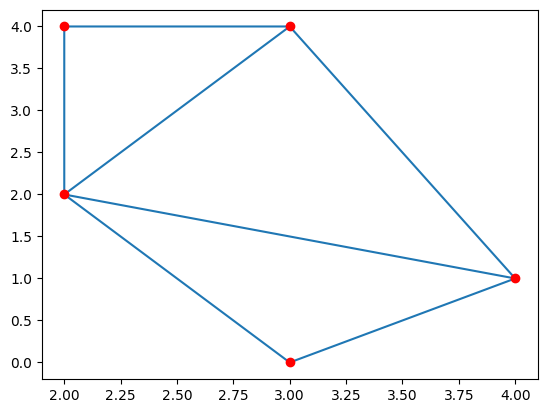

In [26]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1]
])

simplices = Delaunay(points).simplices

plt.triplot(points[:, 0], points[:, 1], simplices)
plt.scatter(points[:, 0], points[:, 1], color='r')

plt.show()

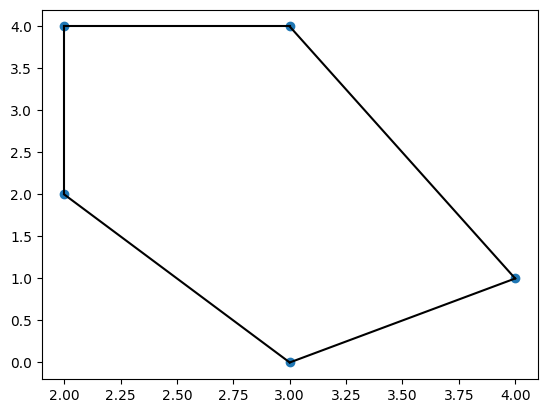

In [27]:
from scipy.spatial import ConvexHull

hull = ConvexHull(points)
hull_points = hull.simplices

plt.scatter(points[:,0], points[:,1])
for simplex in hull_points:
  plt.plot(points[simplex,0], points[simplex,1], 'k-')

plt.show()